In [3]:
# on appelle les libraires
import numpy as np 
import pandas as pd 
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/flora_000/Desktop/ENSAE/Projet Python/Data")
os.getcwd()

'C:\\Users\\flora_000\\Desktop\\ENSAE\\Projet Python\\Data'

In [4]:
# on importe la base de donnée finale
data= pd.read_csv('data_2000.csv',delimiter=',',low_memory=False)
data.describe()
data.head()

,Unnamed: 0,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
0,0,"C33,C34",1,1,Antigua and Barbuda,2000,0,Antigua and Barbuda,1,3796.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
1,1,"C33,C34",2,3,Antigua and Barbuda,2000,0,Antigua and Barbuda,3,3993.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
2,2,"C33,C34",2,4,Antigua and Barbuda,2000,0,Antigua and Barbuda,4,3169.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
3,3,"C33,C34",2,5,Antigua and Barbuda,2000,0,Antigua and Barbuda,5,2611.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065
4,4,"C33,C34",2,6,Antigua and Barbuda,2000,0,Antigua and Barbuda,6,3549.0,...,344.698,23.119577,1.025246,11.202249,2.045597,0.0,344.698,4.439239,7.838379e+08,10094.759065


In [5]:
# Attention me mettre en phase avec Assitan 
data['Mortality_rate2'] = data['Nb_deaths'] / data['Population'] * 100

#  Méthode Bagging : ici, nous allons voir l'algorithme de forêt aléatoire pour une classification et pour une régression.

# Forêts alétoires Régression 

L’algorithme d’agrégation de modèles le plus utilisé est celui des forêts aléatoires (bagging), ce qui ne signifie 
pas qu’il conduit toujours à la meilleure prévision. L'objectif de la forêt aléatoire est de réduire le rique de sur-apprentissage (en comparaison de l'arbre de décision).

Plus que le nombre d’arbres n_estimators, le paramètre à optimiser est le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud : max_features. Par défaut, il prend la valeur p/3 en pour la régression et √p pour la classification. 

In [6]:
# variable à expliquer
Y= data[["Mortality_rate2"]] 
Y.mean()
# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 

# On transforme les variables sous forme de chaînes de caractères en variables binaires :
 # Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.3)

Nous allons calculer le RMSE du modèle en faisant varier les paramètres suivants :
- n_estimators :  Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

n_estimators 1 erreur 0.103458167437 0.104576304246
n_estimators 2 erreur 0.103455514297 0.104575656319
n_estimators 3 erreur 0.103454380592 0.104582968004
n_estimators 4 erreur 0.103472774271 0.104584493372
n_estimators 5 erreur 0.103453083328 0.104577386859
n_estimators 6 erreur 0.10345421002 0.10458240094
n_estimators 7 erreur 0.10345293999 0.104578686645
n_estimators 8 erreur 0.103452968794 0.104579140185
n_estimators 9 erreur 0.103452951858 0.104577985198
n_estimators 10 erreur 0.103457314473 0.104576063314
n_estimators 11 erreur 0.103452883965 0.104577867325
n_estimators 12 erreur 0.103452907941 0.104576918658
n_estimators 13 erreur 0.103454539725 0.104576385863
n_estimators 14 erreur 0.103455224757 0.104584147799
n_estimators 15 erreur 0.103452910703 0.104577080188
n_estimators 16 erreur 0.103453826386 0.104576266132
n_estimators 17 erreur 0.103452876161 0.104578602872
n_estimators 18 erreur 0.103453665868 0.104576041985
n_estimators 19 erreur 0.103453038958 0.104578561832


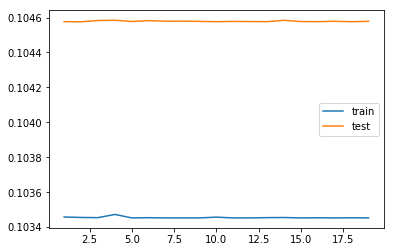

In [14]:
# on fait varier le nombre d'arbre dans la forêt.
curves = []
for n_estimators in range(1,20) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=n_estimators,max_depth=1)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate2"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("n_estimators",n_estimators, "erreur", err_train, err_test)
    curves.append((n_estimators,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# Le modèle ne varie pas en fonction de ce paramètre, on choisit de garder la valeur par défaut n_estimators = 10

max_depth 1 erreur 0.103453966518 0.104581683049
max_depth 2 erreur 0.0839275874665 0.0865836579471
max_depth 3 erreur 0.0639000895454 0.0688046276765
max_depth 4 erreur 0.0533028219955 0.0583047658244
max_depth 5 erreur 0.0450711431775 0.0507640041599
max_depth 6 erreur 0.0371112685715 0.0449065949353
max_depth 7 erreur 0.0307432207757 0.0390978314945
max_depth 8 erreur 0.0257587479055 0.0353254914219
max_depth 9 erreur 0.0224214668921 0.0337753103872
max_depth 10 erreur 0.0196744112445 0.0321655528534
max_depth 11 erreur 0.0181114931439 0.0315844684661
max_depth 12 erreur 0.0155262998134 0.0309592652356
max_depth 13 erreur 0.014509308602 0.0302253810972
max_depth 14 erreur 0.0133996687362 0.0300695944047
max_depth 15 erreur 0.0131343492771 0.0300334332729
max_depth 16 erreur 0.0136978254939 0.0313672192207
max_depth 17 erreur 0.0129055234413 0.0314619072061
max_depth 18 erreur 0.0126323395808 0.0313142425786
max_depth 19 erreur 0.0124250430326 0.0316121652439
max_depth 20 erreur 0.01

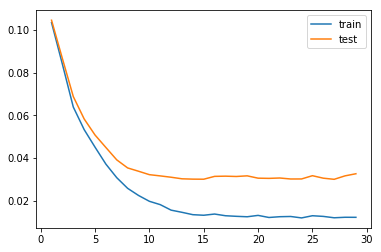

In [15]:
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,30) :
  
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=max_depth)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate2"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_depth",max_depth, "erreur", err_train, err_test)
    curves.append((max_depth,  err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on choisit max_depth = 15

max_features 30 erreur 0.0217034603381 0.0400371537215
max_features 31 erreur 0.0189864204344 0.0393989326798
max_features 32 erreur 0.0195354199938 0.0369932471573
max_features 33 erreur 0.0184578625693 0.0372174893516
max_features 34 erreur 0.0182713827141 0.0363762566337
max_features 35 erreur 0.0164727520755 0.0374938363048
max_features 36 erreur 0.0176926574506 0.0349098399055
max_features 37 erreur 0.0175425910999 0.0360933650182
max_features 38 erreur 0.0202669014068 0.0380370994346
max_features 39 erreur 0.0187192312314 0.0352585385728
max_features 40 erreur 0.0162059880475 0.0346712604875
max_features 41 erreur 0.0159905794656 0.0338504620343
max_features 42 erreur 0.0161165973142 0.033412965954
max_features 43 erreur 0.0159675290713 0.0341891125347
max_features 44 erreur 0.0164720868108 0.0339723778218
max_features 45 erreur 0.0158295003425 0.0335215904935
max_features 46 erreur 0.0157025868602 0.0345186111642
max_features 47 erreur 0.0152566345602 0.0327591947299
max_feature

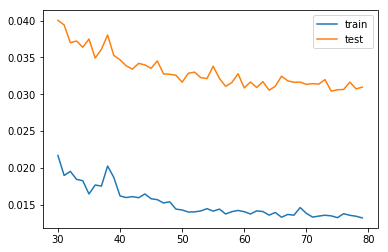

In [17]:
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(30,80) :
    
    # définition des paramètres
    clf = RandomForestRegressor(n_estimators=10,max_depth=15,max_features=max_features)
    # apprentissage
    clf = clf.fit(X_train, Y_train["Mortality_rate2"].ravel())
    
    # on calcule l'erreur (MSE)
    err_train = metrics.mean_squared_error( clf.predict(X_train), Y_train)**0.5
    err_test = metrics.mean_squared_error( clf.predict(X_test), Y_test)**0.5
    print("max_features",max_features, "erreur", err_train, err_test)
    curves.append((max_features, err_train, err_test, clf) )

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde max_features = 80

In [8]:
# le modèle final est le suivant :
RF = RandomForestRegressor(n_estimators=10,max_depth=15,max_features=80)
RF = RF.fit(X_train, Y_train["Mortality_rate2"].ravel())
# RMSE
err_train = metrics.mean_squared_error( RF.predict(X_train), Y_train)**0.5
err_test = metrics.mean_squared_error( RF.predict(X_test), Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)
# R2
R2_train = RF.score(X_train , Y_train)
R2_test = RF.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_train)

RMSE_train 0.01348727709
RMSE_test 0.0282030485771
R2_train 0.990151639827
R2_test 0.990151639827


A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [ ]:
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
# comme le modèle ne varie pas en fonction de n_estimators, on fait varier uniquement max_depth et max_features.
#parametres = {"max_depth":[10],"max_features":[70]}
parametres = {"max_depth":[10,11,12,13,14,15,16,17,18,19,20],"max_features":[70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]}

#classifieur à utiliser – Random Forest
RF = RandomForestRegressor()
#instanciation de la recherche
grille = GridSearchCV(estimator=RF,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train, Y_train)
#meilleur paramétrage : 
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : taux d’erreur = 0.065
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)

{'max_depth': 18, 'max_features': 80}
RMSE_train 0.0134576568011
RMSE_test 0.0294560944794
R2_train 0.952815291509
R2_test 0.952815291509

Les résultats ne sont pas meilleurs que la méthode manuelle. De plus, ils ne sont pas toujours très stables.

# Forêts alétoires Classification

Une forêt aléatoire est un méta-estimateur qui correspond à un certain nombre de classificateurs d'arbres de décision sur divers sous-échantillons de l'ensemble de données et utilise la moyenne pour  améliorer la précision prédictive et contrôler le sur-ajustement. La taille du sous-échantillon est toujours la même que celle de l'échantillon original, mais les échantillons sont remplacés si bootstrap = True (par défaut).

In [15]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate2'].describe()
data.sort_values(by=['Mortality_rate2'], ascending=False)
data['Mortality_rate2'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate2']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate2'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
print(data.groupby(['Mortality_cat'])['Mortality_cat'].count())
print(data.groupby(['Mortality_cat'])['Mortality_rate2'].mean())

Mortality_cat
1     13051
2      1855
3      1863
4      1863
5      1863
6      1863
7      1863
8      1864
9      1863
10     1863
11     1863
12     1863
13     1863
14      373
15      373
16      372
17      373
18      373
Name: Mortality_cat, dtype: int64
Mortality_cat
1     0.000000
2     0.000105
3     0.000376
4     0.000856
5     0.001958
6     0.004334
7     0.008759
8     0.015763
9     0.026243
10    0.041913
11    0.067882
12    0.113848
13    0.206613
14    0.302866
15    0.355359
16    0.434428
17    0.612906
18    0.938473
Name: Mortality_rate2, dtype: float64


In [17]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})


# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 


# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [18]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
print(RandomForestClassifier())
from sklearn import metrics

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Comme pour la régression, nous calculons le RMSE du modèle en faisant varier les paramètres suivants :

- n_estimators : Le nombre d'arbres dans la forêt. (par défaut = 10)
- max_depth : La profondeur maximale de l'arbre. (par défaut = None)
- max_features : le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud

n_estimators 1 erreur 5.40979760587 5.44705365862
n_estimators 2 erreur 4.41004242161 4.52117854726
n_estimators 3 erreur 5.39921387838 5.50040655515
n_estimators 4 erreur 5.6427128721 5.64759673111
n_estimators 5 erreur 4.14973352149 4.24966588185
n_estimators 6 erreur 5.37990119905 5.45132962068
n_estimators 7 erreur 4.78933202783 4.89708942069
n_estimators 8 erreur 4.60948529667 4.69005341903
n_estimators 9 erreur 4.68291455165 4.77253621964
n_estimators 10 erreur 3.35823140081 3.5479087544
n_estimators 11 erreur 3.86830831653 4.01153301591
n_estimators 12 erreur 5.24315957051 5.33067539613
n_estimators 13 erreur 5.01960196886 5.11645246901
n_estimators 14 erreur 4.77434358774 4.85794629635


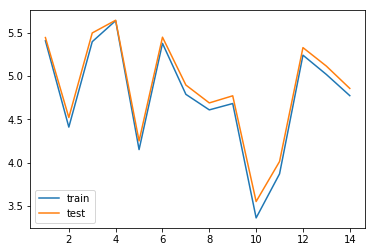

In [20]:
# On cherche les parametres optimaux 
# on fait varier le nombre d'arbre dans la forêt..
curves = []
for n_estimators in range(1,15) :
    

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = n_estimators, max_depth=10 )
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("n_estimators",n_estimators, "erreur",err_train ,err_test)
    curves.append((n_estimators,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()
# on garde la valeur par défaut n_estimators=10

max_depth 1 erreur 6.64129282851 6.57718722335
max_depth 2 erreur 6.64129282851 6.57718722335
max_depth 3 erreur 6.61612847197 6.55363177524
max_depth 4 erreur 6.61336098175 6.54996620183
max_depth 5 erreur 6.53302804614 6.48050606474
max_depth 6 erreur 5.5492006882 5.58439078088
max_depth 7 erreur 6.1555079047 6.11923855565
max_depth 8 erreur 5.77029897432 5.7766106645
max_depth 9 erreur 5.88396071644 5.88487494605
max_depth 10 erreur 5.15072616865 5.20936441792
max_depth 11 erreur 3.50420366659 3.75024149491
max_depth 12 erreur 3.37702667372 3.73681342824
max_depth 13 erreur 2.37638731788 2.96661507597
max_depth 14 erreur 1.96348548875 2.71097286632
max_depth 15 erreur 1.51147022734 2.57433319779
max_depth 16 erreur 1.19474967045 2.3224424254
max_depth 17 erreur 0.934543015957 2.27679827294
max_depth 18 erreur 0.83890688399 2.26813896903
max_depth 19 erreur 0.760047456528 2.21714735576
max_depth 20 erreur 0.684992587076 2.22596484678
max_depth 21 erreur 0.631770186437 2.19458187916
m

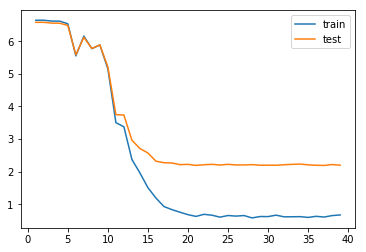

In [21]:
# on fait varier a profondeur maximale de l'arbre.
curves = []
for max_depth in range(1,40) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=max_depth)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    print("max_depth",max_depth, "erreur",err_train ,err_test)
    curves.append((max_depth,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 20

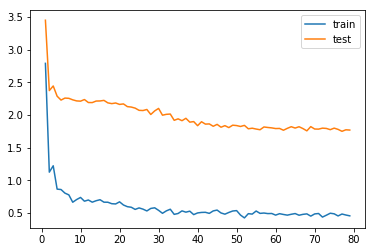

In [27]:
# on fait varier le nombre de variables tirées aléatoirement pour la recherche de la division optimale d’un nœud.
curves = []
for max_features in range(1,80) :

    # Etape 1 : définition des paramètres
    RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=max_features)
    
    # Etape 2 : apprentissage
    RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

    # Etape 3 : prédiction
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)

    # Etape 4 : evaluation  (on calcule l'erreur)
    err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
    err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
    
    #print("max_features",max_features, "erreur",err_train ,err_test)
    curves.append((max_features,err_train ,err_test, RFC)) 

plt.plot ( [c[0] for c in curves], [c[1] for c in curves], label="train")
plt.plot ( [c[0] for c in curves], [c[2] for c in curves], label="test")

plt.legend()  
# on choisit max_depth = 70

In [29]:
# Le modèle final est le suivant :

# Etape 1 : définition des paramètres
RFC= RandomForestClassifier(n_estimators = 10, max_depth=20, max_features=70)

# Etape 2 : apprentissage
RFC = RFC.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner

# Etape 3 : prédiction
Y_pred_train = RFC.predict(X_train)
Y_pred_test  = RFC.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print("RMSE_train", err_train)
print("RMSE_test", err_test)

# R2
R2_train = RFC.score(X_train, Y_train)
R2_test = RFC.score(X_test, Y_test)
print("R2_train",R2_train)
print("R2_test",R2_train)

RMSE_train 0.49626731225
RMSE_test 1.77819731434
R2_train 0.980141082656
R2_test 0.980141082656


In [ ]:
A présent, nous utilisons une méthode automatique de recherche des paramètres pour comparer les résultats.

In [ ]:
#outil grille de recherche
from sklearn.grid_search import GridSearchCV

#combinaisons de paramètres à tester : Scikit-learn va évaluer toutes les combinaisons
parametres = {"max_depth":[15,16,17,18,19,20,21,22,23,24,25],"max_features":[60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]}

#classifieur à utiliser – Random Forest
RFC= RandomForestClassifier()
#instanciation de la recherche
grille = GridSearchCV(estimator=RFC,param_grid=parametres)

#lancer l'exploration
resultats = grille.fit(X_train,Y_train["Mortality_cat"].ravel())
print(resultats.best_params_)
#prédiction avec le ‘’meilleur’’ modèle identifié
Y_pred_train = resultats.predict(X_train)
Y_pred_test = resultats.predict(X_test) 
#performances du ‘’meilleur’’ modèle : 
# RMSE
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)
# R2
R2_train = resultats.score(X_test, Y_test)
R2_test = resultats.score(X_test, Y_test)
print(R2_train)
print(R2_test)

# Résultat méthode manuelle: 1.617870509 2.4612743038 0.440966010733 0.440966010733
# résultat de la méthode automatique : 2.6439974058 3.19650132979 0.424329159213 0.424329159213
# les résultats avec cette méthode sont pas stable et moins bons

# Méthode Boosting : ici, nous allons voir l'algorithme de Gradient Boosting Machine (gbm) pour une classification.

# Gradient Bossting Machine Classification

GB construit un modèle additif; il permet l'optimisation de fonctions de pertes différentiables arbitraires. A chaque étape, n_classes_ les arbres de régression sont ajustés sur le gradient négatif de la fonction de perte de déviance binomiale ou multinomiale. La classification binaire est un cas particulier où un seul arbre de régression est induit.

In [31]:
# on crée des tranches pour la variables taux de mortalité
data['Mortality_rate2'].describe()
data.sort_values(by=['Mortality_rate2'], ascending=False)
data['Mortality_rate2'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
data[data['Mortality_rate2']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
 
# on crée 18 tranches
data['Mortality_cat'] = pd.qcut(data['Mortality_rate2'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 
data.groupby(['Mortality_cat'])['Mortality_cat'].count()
data.groupby(['Mortality_cat'])['Mortality_rate2'].mean()

Mortality_cat
1     0.000000
2     0.000105
3     0.000376
4     0.000856
5     0.001958
6     0.004334
7     0.008759
8     0.015763
9     0.026243
10    0.041913
11    0.067882
12    0.113848
13    0.206613
14    0.302866
15    0.355359
16    0.434428
17    0.612906
18    0.938473
Name: Mortality_rate2, dtype: float64

In [32]:
# variable à expliquer
Y= data["Mortality_cat"] 
type(Y)
Y2 = pd.DataFrame({'Mortality_cat':Y})

# variables explicatives
X= data[["Sex","Age_bucket","Year","Country", "SP.URB.TOTL.IN.ZS","SP.URB.GROW","SP.POP.GROW","SE.PRM.DURS",
"AG.SRF.TOTL.K2","SE.PRE.DURS","EN.POP.DNST","SE.SEC.DURS","SP.DYN.CBRT.IN","SP.DYN.CDRT.IN",
"NY.ADJ.AEDU.GN.ZS", "SP.DYN.TFRT.IN", "SP.ADO.TFRT", "SP.DYN.LE00.FE.IN", "SP.DYN.LE00.IN",
"SP.POP.DPND","SP.DYN.AMRT.FE","SP.DYN.AMRT.MA","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE",
"AG.LND.AGRI.K2", "EN.ATM.GHGO.KT.CE","AG.LND.AGRI.ZS","AG.PRD.FOOD.XD","IT.CEL.SETS",
"AG.PRD.LVSK.XD","AG.PRD.CROP.XD","IT.MLT.MAIN","EN.ATM.GHGT.KT.CE","EN.ATM.CO2E.GF.ZS",
"EN.ATM.CO2E.LF.ZS","EN.ATM.CO2E.SF.ZS","NY.GDP.FRST.RT.ZS","NY.GDP.MINR.RT.ZS","EN.ATM.CO2E.LF.KT",
"EN.ATM.METH.AG.KT.CE","EN.ATM.METH.EG.KT.CE","EN.ATM.NOXE.AG.KT.CE", "EN.ATM.NOXE.EG.KT.CE",
"NY.GDP.TOTL.RT.ZS", "EN.ATM.CO2E.KT","EN.ATM.CO2E.PC","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD"]] 

# On transforme les variables sous forme de chaînes de caractères en variables binaires :
# Ici, seul la variable country est concernée
X2 = X.T.to_dict().values()
from sklearn.feature_extraction import DictVectorizer
prep = DictVectorizer()
X3 = prep.fit_transform(X2).toarray()

# on constitut nos deux échantillons "train" et "test" 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y2, test_size=0.3)

In [33]:
#importation de la classe GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Etape 1 : définition des paramètres
GB = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,subsample=1.0)

# Etape 2 : apprentissage
GB = GB.fit(X_train,  Y_train["Mortality_cat"].ravel())  #attention c'est assez long à tourner 12 min

# Etape 3 : prédiction
Y_pred_train = GB.predict(X_train)
Y_pred_test = GB.predict(X_test)

# Etape 4 : evaluation  (on calcule l'erreur)

# on calcule l'erreur (RMSE)
err_train = metrics.mean_squared_error( Y_pred_train, Y_train)**0.5
err_test = metrics.mean_squared_error( Y_pred_test, Y_test)**0.5
print(err_train)
print(err_test)

# R2
R2_train = GB.score(X_train, Y_train)
R2_test = GB.score(X_test, Y_test)
print(R2_train)
print(R2_test)

1.67401640698
1.79067850744
0.693911976691
0.607602862254


On pourrait certainement trouver de meilleurs résultats en testant d'autres paramètres, mais le temps de traitement est très long juste pour un seul algorithme. Je n'ai pas creusé cette piste.